# HW_6

In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                       0.0                   2.687848   
1                       0.0                  -0.201379   
2                       0.0                   0.608496   
3                       0.0                  -0.082282   
4                       0.0                   2.083069   

   4.608603078297135447e-01  
0                  2.366961  
1                  0.470430  
2                  1.225400  
3                  1.137218  
4                  2.694482  


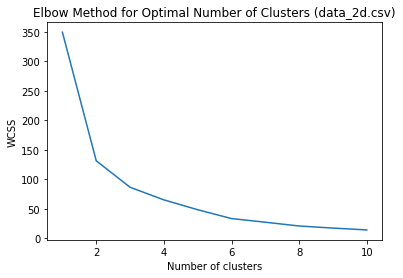

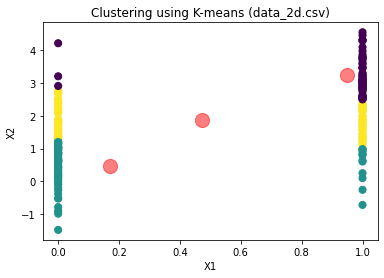

In [39]:
data_2d = pd.read_csv('data_2d.csv')
print(data_2d.head())

# Отримємо значення X1 та X2 для кластеризації
X = data_2d.iloc[:, [0, 1]].values

# Перевірка кількох значень кластерів і обчислення WCSS
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Візуалізація ліктьової кривої
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters (data_2d.csv)')
plt.show()

# Вибір оптимальної кількості кластерів
optimal_clusters = 3  # З ліктьової кривої видно, що оптимальною кількістю кластерів є 3

# Застосуєм алгоритму K-means з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Візуалізація
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Clustering using K-means (data_2d.csv)')
plt.show()

   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


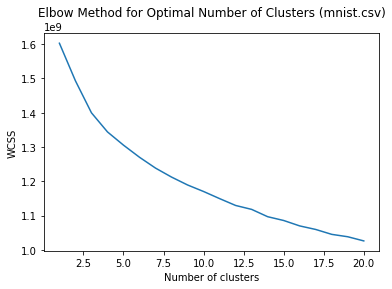

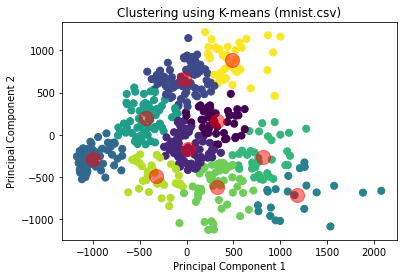

In [40]:
mnist = pd.read_csv('mnist.csv')
print(mnist.head())

# Отримємо значення X1 та X2 для кластеризації
X_mnist = mnist.iloc[:, 1:].values

# Перевірка кількох значень кластерів і обчислення WCSS
wcss_mnist = []
for i in range(1, 21):  # Візьмемо більший діапазон для mnist
    kmeans_mnist = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans_mnist.fit(X_mnist)
    wcss_mnist.append(kmeans_mnist.inertia_)

# Візуалізація ліктьової кривої
plt.plot(range(1, 21), wcss_mnist)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters (mnist.csv)')
plt.show()

# Вибір оптимальної кількості кластерів
optimal_clusters_mnist = 10  # З ліктьової кривої видно, що оптимальною кількістю кластерів є 10

# Зменшим розмірність до 2-вимірного варіанту за допомогою PCA
pca = PCA(n_components=2)
X_mnist_pca = pca.fit_transform(X_mnist)

# Застосуєм алгоритм K-means з оптимальною кількістю кластерів
kmeans_mnist = KMeans(n_clusters=optimal_clusters_mnist, n_init=10, random_state=42)
kmeans_mnist.fit(X_mnist_pca)
y_kmeans_mnist = kmeans_mnist.predict(X_mnist_pca)

# Візуалізація
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=y_kmeans_mnist, s=50, cmap='viridis')
plt.scatter(kmeans_mnist.cluster_centers_[:, 0], kmeans_mnist.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering using K-means (mnist.csv)')
plt.show()